In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#Loading the dataset
data = pd.read_csv('insurance.csv')

# Displaying the first few rows
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [8]:
#Checking for missing values and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [9]:
#Getting summary statistics
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


**DATA CLEANING**

In [34]:
#Handling missing values if any 
data = data.dropna()

In [11]:
#Encoding categorical variables
data = pd.get_dummies(data, columns=['sex','smoker','region'], drop_first = True)

In [14]:
#Creating BMI categories(feature engineering)
data['bmi_category'] = pd.cut(data['bmi'], bins=[0, 18.5, 24.9, 29.9, 40], labels = ['underweight', 'normal', 'overweight', 'obese'])
data = pd.get_dummies(data, columns=['bmi_category'], drop_first = True)

**STATISTICAL ANALYSIS**

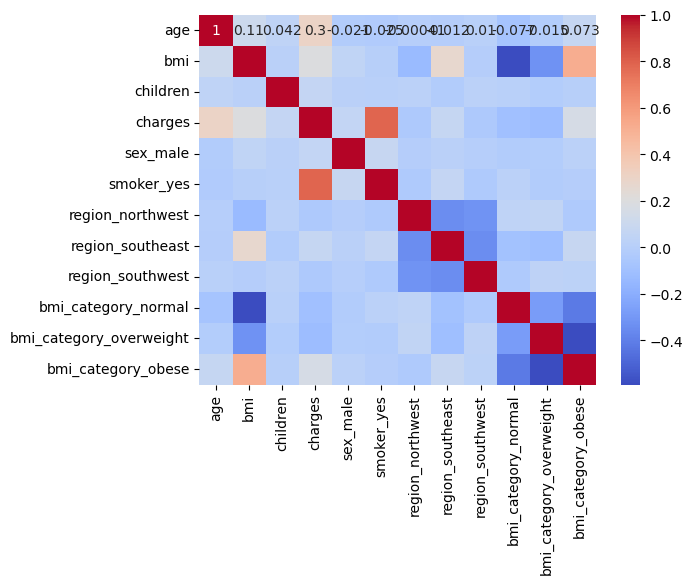

In [15]:
#Correlation analysis
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [17]:
#Group analysis
print(data.groupby('smoker_yes')['charges'].mean())

smoker_yes
False     8434.268298
True     32050.231832
Name: charges, dtype: float64





**VISUALISATION**

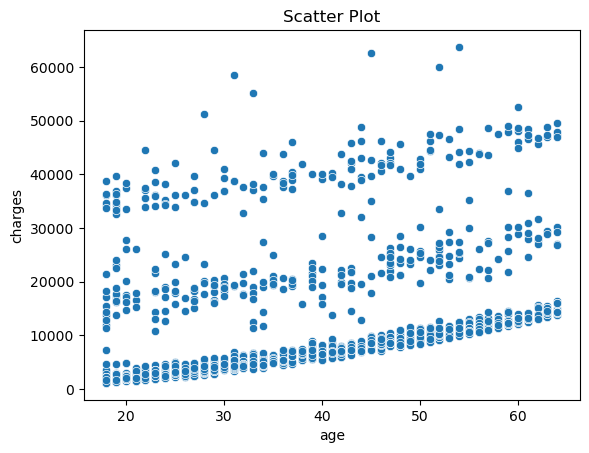

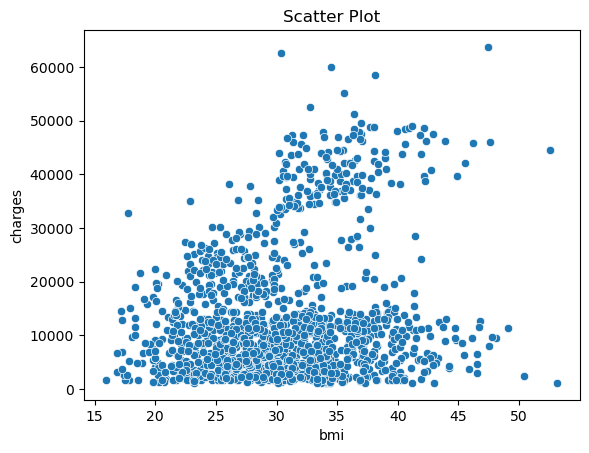

In [25]:
#Scatter plots
sns.scatterplot(x = 'age', y= 'charges' ,data = data)
plt.title("Scatter Plot")
plt.show()

sns.scatterplot(x = 'bmi', y = 'charges', data = data)
plt.title("Scatter Plot")
plt.show()

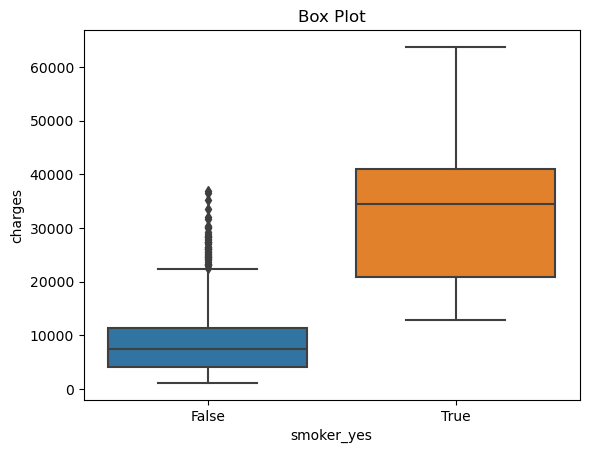

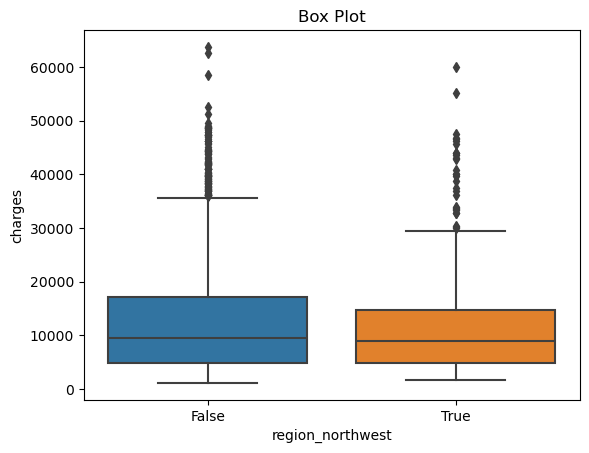

In [27]:
#Box plots
sns.boxplot(x = 'smoker_yes', y = 'charges', data=data)
plt.title("Box Plot")
plt.show()

sns.boxplot(x = 'region_northwest', y = 'charges', data=data)
plt.title("Box Plot")
plt.show()

**PREDICTIVE MODELING**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Feature selection 
X = data.drop('charges', axis = 1)
y = data['charges']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Model Building 
model = LinearRegression()
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)

#Model evaluation
print('RSME:', mean_squared_error(y_test, y_pred, squared=False))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

RSME: 5805.648609146633
MAE: 4282.935553019252
R-squared: 0.7828931969426606


**CONCLUSIONS AND INSIGHTS**

In [33]:
# Summarizing key findings
print("Key Findings:")
print("- Smokers tend to have significantly higher insurance charges.")
print("- Age and BMI are positively correlated with insurance charges.")
print("- Geographic region also influences insurance costs.")

# Recommendations
print("Recommendations:")
print("- Insurance companies could consider personalized pricing based on these attributes.")
print("- Promoting healthier lifestyles could help reduce insurance costs.")

Key Findings:
- Smokers tend to have significantly higher insurance charges.
- Age and BMI are positively correlated with insurance charges.
- Geographic region also influences insurance costs.
Recommendations:
- Insurance companies could consider personalized pricing based on these attributes.
- Promoting healthier lifestyles could help reduce insurance costs.
